In [627]:
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation (new version uses model_selection)
from sklearn.model_selection import train_test_split

import seaborn as sns

C:\Users\Marko\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [126]:
credit = pd.read_csv("CreditOneData.csv")

In [127]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_ next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [128]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 24 columns):
LIMIT_BAL                      30201 non-null int64
SEX                            30201 non-null int64
EDUCATION                      30201 non-null int64
MARRIAGE                       30201 non-null int64
AGE                            30201 non-null int64
PAY_0                          30201 non-null int64
PAY_2                          30201 non-null int64
PAY_3                          30201 non-null int64
PAY_4                          30201 non-null int64
PAY_5                          30201 non-null int64
PAY_6                          30201 non-null int64
BILL_AMT1                      30201 non-null int64
BILL_AMT2                      30201 non-null int64
BILL_AMT3                      30201 non-null int64
BILL_AMT4                      30201 non-null int64
BILL_AMT5                      30201 non-null int64
BILL_AMT6                      30201 non-null int64
PAY_AMT

In [129]:
credit.drop_duplicates()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_ next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [130]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 24 columns):
LIMIT_BAL                      30201 non-null int64
SEX                            30201 non-null int64
EDUCATION                      30201 non-null int64
MARRIAGE                       30201 non-null int64
AGE                            30201 non-null int64
PAY_0                          30201 non-null int64
PAY_2                          30201 non-null int64
PAY_3                          30201 non-null int64
PAY_4                          30201 non-null int64
PAY_5                          30201 non-null int64
PAY_6                          30201 non-null int64
BILL_AMT1                      30201 non-null int64
BILL_AMT2                      30201 non-null int64
BILL_AMT3                      30201 non-null int64
BILL_AMT4                      30201 non-null int64
BILL_AMT5                      30201 non-null int64
BILL_AMT6                      30201 non-null int64
PAY_AMT

In [103]:
print(credit.isnull().sum())

LIMIT_BAL                      0
SEX                            0
EDUCATION                      0
MARRIAGE                       0
AGE                            0
PAY_0                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                      0
BILL_AMT2                      0
BILL_AMT3                      0
BILL_AMT4                      0
BILL_AMT5                      0
BILL_AMT6                      0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
default_payment_ next_month    0
dtype: int64


In [105]:
credit.dtypes

LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default_payment_ next_month    int64
dtype: object

In [180]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 24 columns):
LIMIT_BAL                      30201 non-null int64
SEX                            30201 non-null int64
EDUCATION                      30201 non-null int64
MARRIAGE                       30201 non-null int64
AGE                            30201 non-null int64
PAY_0                          30201 non-null int64
PAY_2                          30201 non-null int64
PAY_3                          30201 non-null int64
PAY_4                          30201 non-null int64
PAY_5                          30201 non-null int64
PAY_6                          30201 non-null int64
BILL_AMT1                      30201 non-null int64
BILL_AMT2                      30201 non-null int64
BILL_AMT3                      30201 non-null int64
BILL_AMT4                      30201 non-null int64
BILL_AMT5                      30201 non-null int64
BILL_AMT6                      30201 non-null int64
PAY_AMT

In [629]:
corrMat = credit.corr()
print(corrMat)

                             LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                     1.000000  0.024899  -0.231201 -0.109024   
SEX                           0.024899  1.000000   0.014293 -0.031882   
EDUCATION                    -0.231201  0.014293   1.000000 -0.148667   
MARRIAGE                     -0.109024 -0.031882  -0.148667  1.000000   
AGE                           0.146340 -0.090839   0.181845 -0.414769   
PAY_0                        -0.271197 -0.057877   0.113074  0.020399   
PAY_2                        -0.296601 -0.070866   0.130830  0.024421   
PAY_3                        -0.285772 -0.066182   0.122980  0.032552   
PAY_4                        -0.267111 -0.060341   0.117211  0.033364   
PAY_5                        -0.249155 -0.055533   0.104709  0.035837   
PAY_6                        -0.235144 -0.044895   0.089516  0.034540   
BILL_AMT1                     0.285503 -0.034018   0.016785 -0.024432   
BILL_AMT2                     0.278609 -0.031565   

In [630]:
import pandas_profiling
pandas_profiling.ProfileReport(credit)

C:\Users\Marko\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,24
Number of observations,30201
Total Missing (%),0.0%
Total size in memory,5.5 MiB
Average record size in memory,192.0 B
Numeric,17
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


In [635]:
pd.cut(credit["AGE"], bins=6)

0        (20.942, 30.667]
1        (20.942, 30.667]
2        (30.667, 40.333]
3        (30.667, 40.333]
4          (50.0, 59.667]
               ...       
30196    (30.667, 40.333]
30197      (40.333, 50.0]
30198    (30.667, 40.333]
30199      (40.333, 50.0]
30200      (40.333, 50.0]
Name: AGE, Length: 30201, dtype: category
Categories (6, interval[float64]): [(20.942, 30.667] < (30.667, 40.333] < (40.333, 50.0] < (50.0, 59.667] < (59.667, 69.333] < (69.333, 79.0]]

In [721]:
#features
X = credit.iloc[:,0:23]
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [722]:
#dependent variable 
y= credit['default_payment_ next_month']

In [723]:
from sklearn.linear_model import LinearRegression

In [724]:
model = LinearRegression()

In [725]:
print(y)

0     1
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    0
Name: default_payment_ next_month, dtype: int64


In [726]:
from sklearn.model_selection import cross_val_score

In [727]:
print(cross_val_score(model, X, y, cv = 3))

[-1524.64333327  -198.44931918 -4866.83389064]


In [728]:
algosClass = []
algosClass.append(('RandomForestRegressor', RandomForestRegressor())) 
algosClass.append(('LinearRegression', LinearRegression()))
algosClass.append(('SupportVectorRegression', SVR()))

In [729]:
#regression
results = []
names = []
for name, model in algosClass:
        result = cross_val_score(model, X, y, cv = 3, scoring = 'r2')
        names.append(name)
        results.append(result)

In [730]:
for i in range (len(names)):
    print(names[i], results[i].mean())

RandomForestRegressor -0.14909301587301574
LinearRegression -2196.642181030043
SupportVectorRegression -0.25306368903441695


In [731]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

In [732]:
#modeling
algo = LinearRegression()
model = LinearRegression()
model = LinearRegression().fit(X_train, y_train)

In [733]:
predictions = model.predict(X_test)
print(predictions)

[ 3.37602321 -1.96055325  0.83690087 -4.24351201  2.33393627  2.60375023
  3.2002035   3.85645401]


In [734]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [735]:
from math import sqrt

In [736]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [737]:
predRsquared = r2_score(y_test,predictions)

In [738]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('rmse: %.3f' % rmse)

R Squared: -49.358
rmse: 3.073


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


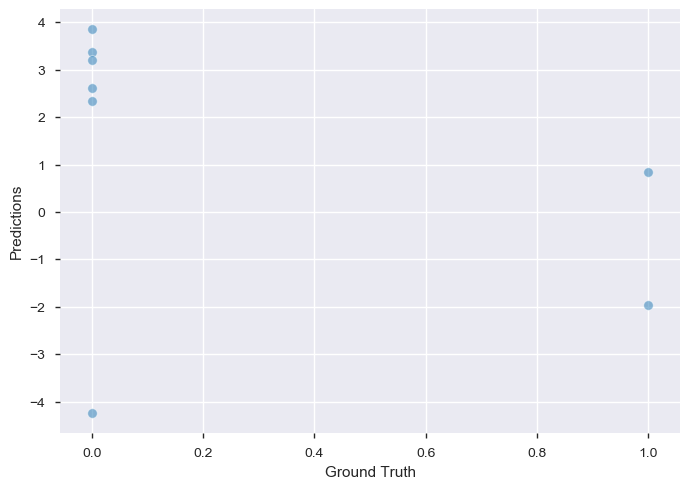

In [739]:
sns.scatterplot(x = y_test, y = predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [740]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df)

    Actual  Predicted
5        0   3.376023
21       1  -1.960553
22       1   0.836901
18       0  -4.243512
15       0   2.333936
8        0   2.603750
7        0   3.200203
11       0   3.856454


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


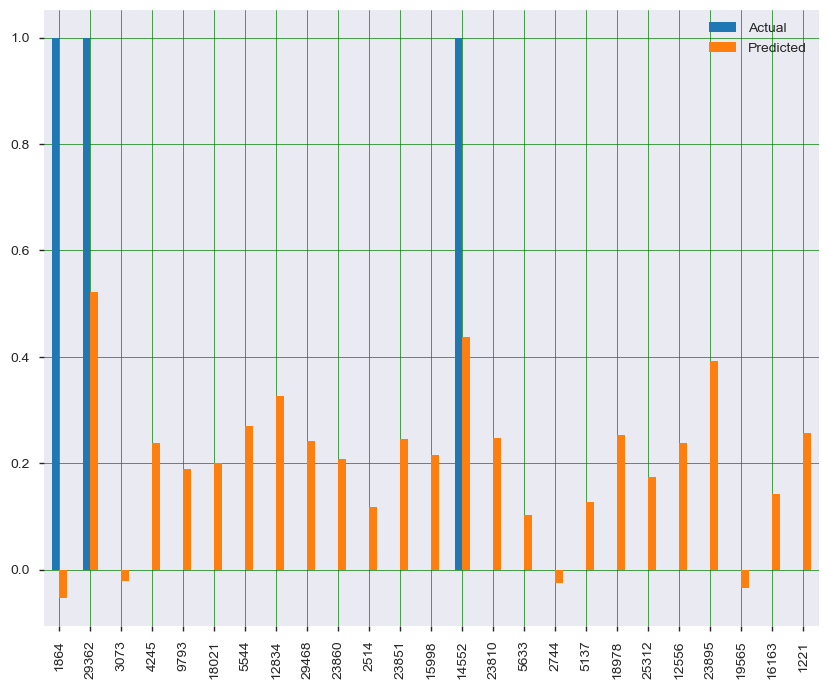

In [685]:
plot = df.head(25)
plot.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [741]:
#Model Tuning
#features
X2 = credit.iloc[:,0:5]
X2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000,2,2,1,24
1,120000,2,2,2,26
2,90000,2,2,2,34
3,50000,2,2,1,37
4,50000,1,2,1,57


In [742]:
#dependent variable 
y2= credit['default_payment_ next_month']

In [743]:
model2 = LinearRegression()

In [744]:
print(cross_val_score(model2, X2, y2, cv = 3))

[-1.21044609 -0.2753219  -0.20212873]


In [745]:
algosClass = []
algosClass.append(('RandomForestRegressor', RandomForestRegressor())) 
algosClass.append(('LinearRegression', LinearRegression()))
algosClass.append(('SupportVectorRegression', SVR()))

In [746]:
#regression
results = []
names = []
for name, model2 in algosClass:
        result = cross_val_score(model2, X2, y2, cv = 3, scoring = 'r2')
        names.append(name)
        results.append(result)

In [747]:
for i in range (len(names)):
    print(names[i], results[i].mean())

RandomForestRegressor -0.17742539682539674
LinearRegression -0.5626322416479411
SupportVectorRegression -0.1639697206235778


In [748]:
#Train/Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.30, random_state = 123)

In [749]:
#modeling
algo = LinearRegression()

In [750]:
model2 = LinearRegression()
model2 = LinearRegression().fit(X_train2, y_train2)

In [751]:
predictions2 = model2.predict(X_test2)
print(predictions2)

[ 0.01501886  0.49520096  0.42659861  0.11741268  0.05511266  0.91103344
  0.52973321 -0.46539624]


In [752]:
rmse = sqrt(mean_squared_error(y_test2, predictions2))

In [753]:
predRsquared = r2_score(y_test2,predictions2)

In [754]:
#Make Predictions
predictions2 = model2.predict(X_test2)
predRsquared = r2_score(y_test2, predictions2)
rmse = sqrt(mean_squared_error(y_test2, predictions2))
print('R Squared: %.3f' % predRsquared)
print('rmse: %.3f' % rmse)

R Squared: -0.285
rmse: 0.491


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


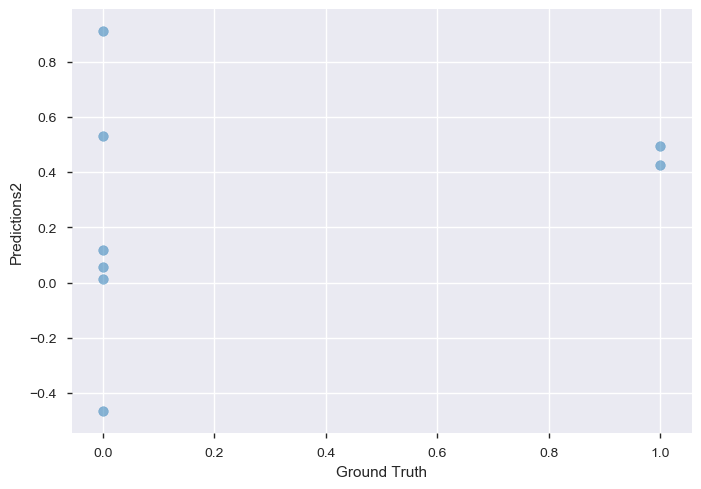

In [755]:
plt.scatter(y_test2, predictions2, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions2')
plt.show();

In [756]:
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': predictions2})
print(df2)

    Actual  Predicted
5        0   0.015019
21       1   0.495201
22       1   0.426599
18       0   0.117413
15       0   0.055113
8        0   0.911033
7        0   0.529733
11       0  -0.465396


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


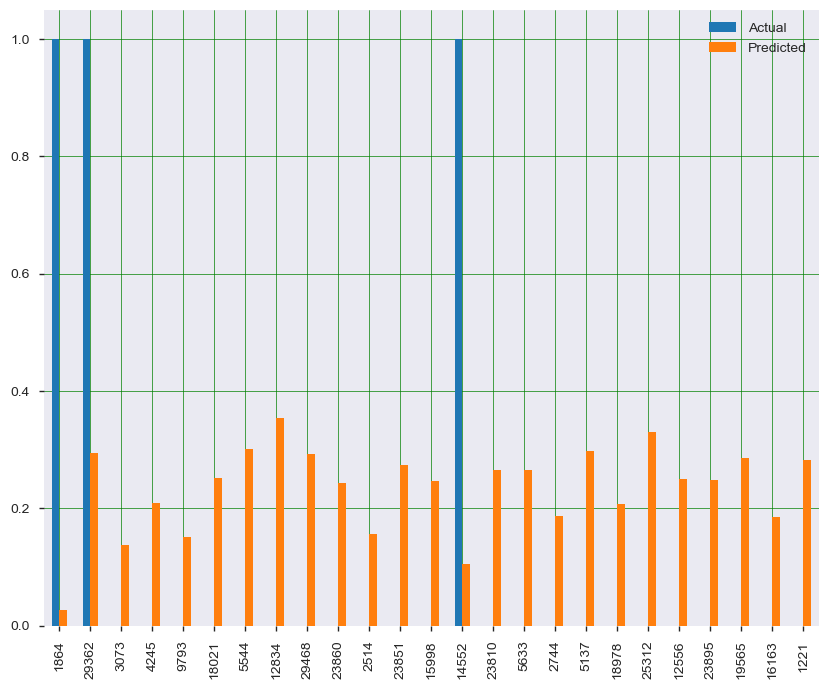

In [691]:
plot2 = df2.head(25)
plot2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [758]:
#Model Tuning Predict Marriage using other demographic information
#features
X3 = credit.iloc[:, [0,1,2,4,23]]
X3.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,default_payment_ next_month
0,20000,2,2,24,1
1,120000,2,2,26,1
2,90000,2,2,34,0
3,50000,2,2,37,0
4,50000,1,2,57,0


In [759]:
#dependent variable 
y3= credit['MARRIAGE']

In [760]:
model3 = LinearRegression()

In [761]:
print(cross_val_score(model3, X3, y3, cv = 3))

[-1.12294689 -2.81380664  0.22218898]


In [762]:
#regression
results = []
names = []
for name, model3 in algosClass:
        result = cross_val_score(model3, X3, y3, cv = 3, scoring = 'r2')
        names.append(name)
        results.append(result)

In [763]:
for i in range (len(names)):
    print(names[i], results[i].mean())

RandomForestRegressor -2.3299935714285716
LinearRegression -1.2381881824399226
SupportVectorRegression -1.3513834978009331


In [764]:
#Train/Test Split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.30, random_state = 123)

In [765]:
model3 = LinearRegression()
model3 = LinearRegression().fit(X_train3, y_train3)

In [766]:
predictions3 = model3.predict(X_test3)
print(predictions3)

[1.46533414 1.15976578 1.6683062  0.9584604  2.38483563 2.2536573
 2.13012744 0.78220189]


In [767]:
rmse = sqrt(mean_squared_error(y_test3, predictions3))

In [768]:
predRsquared = r2_score(y_test3,predictions3)

In [769]:
#Make Predictions
predictions3 = model3.predict(X_test3)
predRsquared = r2_score(y_test3, predictions3)
rmse = sqrt(mean_squared_error(y_test3, predictions3))
print('R Squared: %.3f' % predRsquared)
print('rmse: %.3f' % rmse)

R Squared: -0.107
rmse: 0.696


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


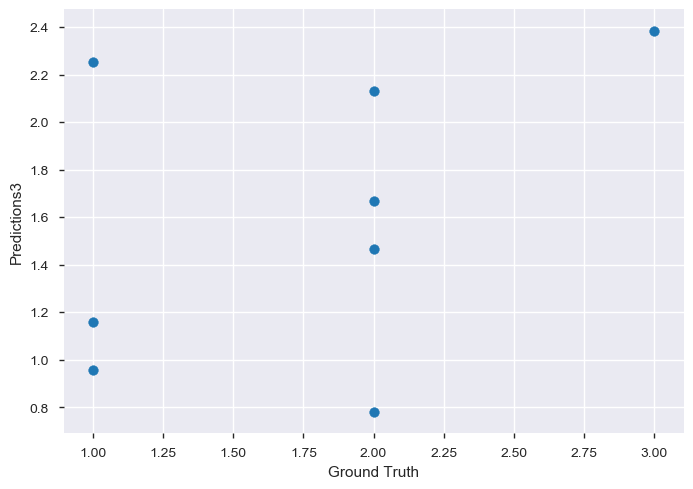

In [770]:
plt.scatter(y_test3, predictions3)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions3')
plt.show();

In [774]:
df3 = pd.DataFrame({'Actual': y_test3, 'Predicted': predictions3})
print(df3)

    Actual  Predicted
5        2   1.465334
21       1   1.159766
22       2   1.668306
18       1   0.958460
15       3   2.384836
8        1   2.253657
7        2   2.130127
11       2   0.782202


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


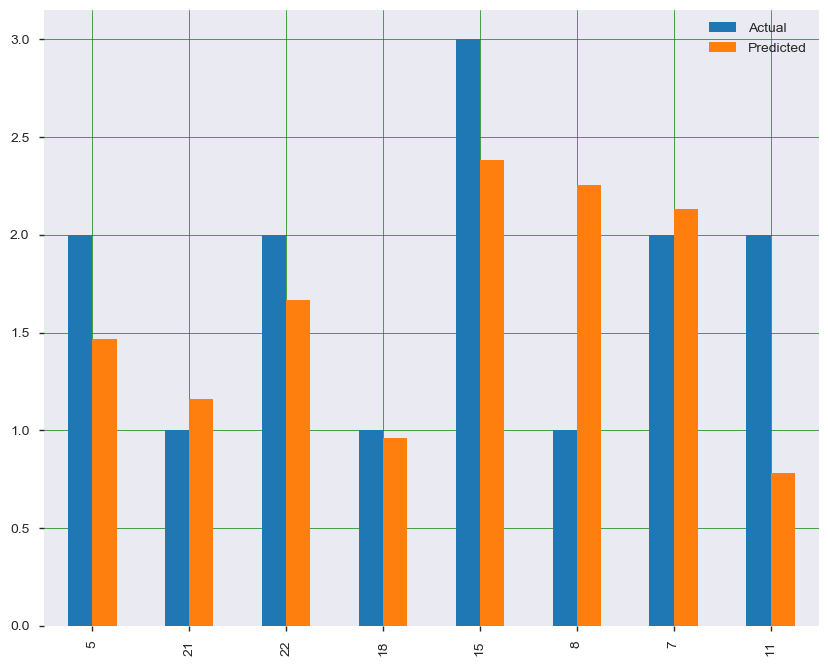

In [775]:
plot3 = df3.head(25)
plot3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [771]:
#Model Tuning
#features
X4 = credit.iloc[:, [0,1,3,4,23]]
X4.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,default_payment_ next_month
0,20000,2,1,24,1
1,120000,2,2,26,1
2,90000,2,2,34,0
3,50000,2,1,37,0
4,50000,1,1,57,0


In [772]:
#dependent variable 
y4= credit['EDUCATION']

In [773]:
model4 = LinearRegression()

In [585]:
print(cross_val_score(model4, X4, y4, cv = 3))

[0.11005529 0.1226075  0.09159396]


In [586]:
#regression
results = []
names = []
for name, model4 in algosClass:
        result = cross_val_score(model4, X4, y4, cv = 3, scoring = 'r2')
        names.append(name)
        results.append(result)

In [587]:
for i in range (len(names)):
    print(names[i], results[i].mean())

RandomForestRegressor -0.015713993780404056
LinearRegression 0.10808558253013245
SupportVectorRegression 0.006741855607354889


In [588]:
#Train/Test Split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.30, random_state = 123)

In [589]:
model4 = LinearRegression()
model4 = LinearRegression().fit(X_train4, y_train4)

In [590]:
predictions4 = model4.predict(X_test4)
print(predictions4)

[1.27724917 2.29650787 1.4805158  ... 1.72153281 1.72918744 1.92048992]


In [594]:
rmse4 = sqrt(mean_squared_error(y_test4, predictions4))

In [595]:
predRsquared4 = r2_score(y_test4,predictions4)

In [596]:
#Make Predictions
predictions4 = model4.predict(X_test4)
predRsquared4 = r2_score(y_test4, predictions4)
rmse4 = sqrt(mean_squared_error(y_test4, predictions4))
print('R Squared: %.3f' % predRsquared4)
print('rmse: %.3f' % rmse4)

R Squared: 0.107
rmse: 0.700


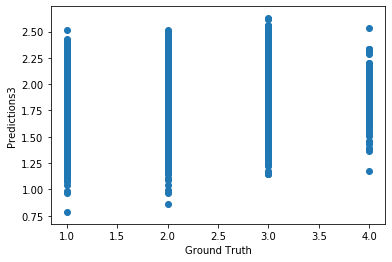

In [597]:
plt.scatter(y_test4, predictions4)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions3')
plt.show();

In [650]:
#features test #5 Age
X5 = credit.iloc[:,:5]
X5.head()

#dependent variable 
y5= credit['default_payment_ next_month']

#model
model5 = LinearRegression()

#Cross Validation
print(cross_val_score(model5, X5, y5, cv = 3))

[0.01645133 0.02773958 0.03166019]


In [703]:
#regression
results = []
names = []
for name, model6 in algosClass:
        result = cross_val_score(model6, X6, y6, cv = 3, scoring = 'r2')
        names.append(name)
        results.append(result)
        
for i in range (len(names)):
    print(names[i], results[i].mean())

RandomForestRegressor -0.4203398412698411
LinearRegression -0.3050981753324505
SupportVectorRegression -0.1637726627946369


In [652]:
credit = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

AttributeError: 'Series' object has no attribute 'flatten'

C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


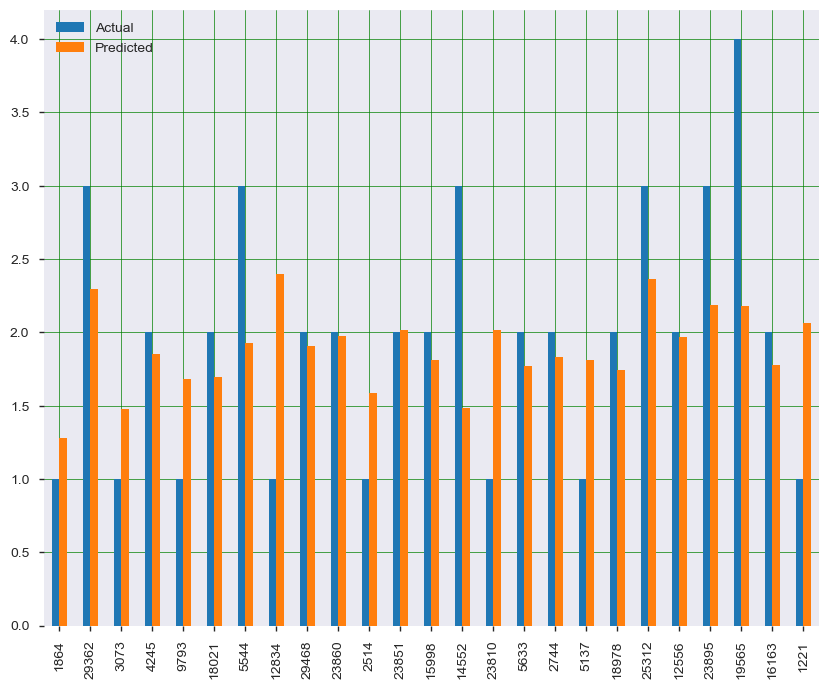

In [683]:
plot4 = df4.head(25)
plot4.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [681]:
df4 = pd.DataFrame({'Actual': y_test4, 'Predicted': predictions4})
print(df)

       Actual  Predicted
1864        1   1.277249
29362       3   2.296508
3073        1   1.480516
4245        2   1.854137
9793        1   1.680069
...       ...        ...
16512       3   2.110526
4544        2   2.003732
22432       2   1.721533
808         1   1.729187
13190       2   1.920490

[9061 rows x 2 columns]


In [778]:
#features test #6 Marriage
X6 = credit.iloc[:,:3]
X6.head()

#dependent variable 
y6= credit['default_payment_ next_month']

#model
model6 = LinearRegression()

#Cross Validation
print(cross_val_score(model6, X6, y6, cv = 3))

[-0.03713039 -0.71502462 -0.16313952]


In [779]:
#regression
results = []
names = []
for name, model6 in algosClass:
        result = cross_val_score(model6, X6, y6, cv = 3, scoring = 'r2')
        names.append(name)
        results.append(result)
        
for i in range (len(names)):
    print(names[i], results[i].mean())

RandomForestRegressor -0.3497539682539683
LinearRegression -0.3050981753324505
SupportVectorRegression -0.1637726627946369


In [780]:
#Train/Test Split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = 0.30, random_state = 123)

In [802]:
#modeling
algo = LinearRegression()
model6 = LinearRegression()
model6 = LinearRegression().fit(X_train6, y_train6)

In [803]:
predictions6 = model6.predict(X_test6)
print(predictions6)

[0.44671779 0.40473539 0.44540745 0.41585363 0.25533216 0.18212245
 0.42100421 0.49719774]


In [804]:
rmse6 = sqrt(mean_squared_error(y_test6, predictions6))
predRsquared6 = r2_score(y_test6,predictions6)

In [805]:
#Make Predictions
predictions6 = model6.predict(X_test6)
predRsquared6 = r2_score(y_test6, predictions6)
rmse6 = sqrt(mean_squared_error(y_test6, predictions6))
print('R Squared: %.3f' % predRsquared6)
print('rmse: %.3f' % rmse6)

R Squared: -0.038
rmse: 0.441


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


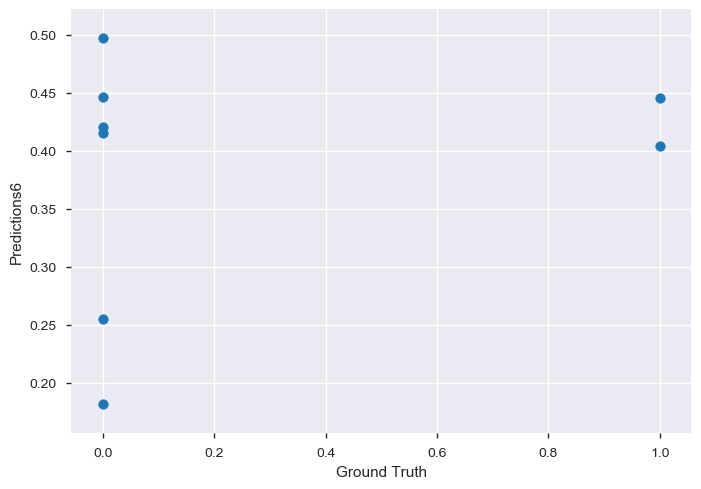

In [806]:
plt.scatter(y_test6, predictions6)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions6')
plt.show();

In [807]:
df6 = pd.DataFrame({'Actual': y_test6, 'Predicted': predictions6})
print(df6)

    Actual  Predicted
5        0   0.446718
21       1   0.404735
22       1   0.445407
18       0   0.415854
15       0   0.255332
8        0   0.182122
7        0   0.421004
11       0   0.497198


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


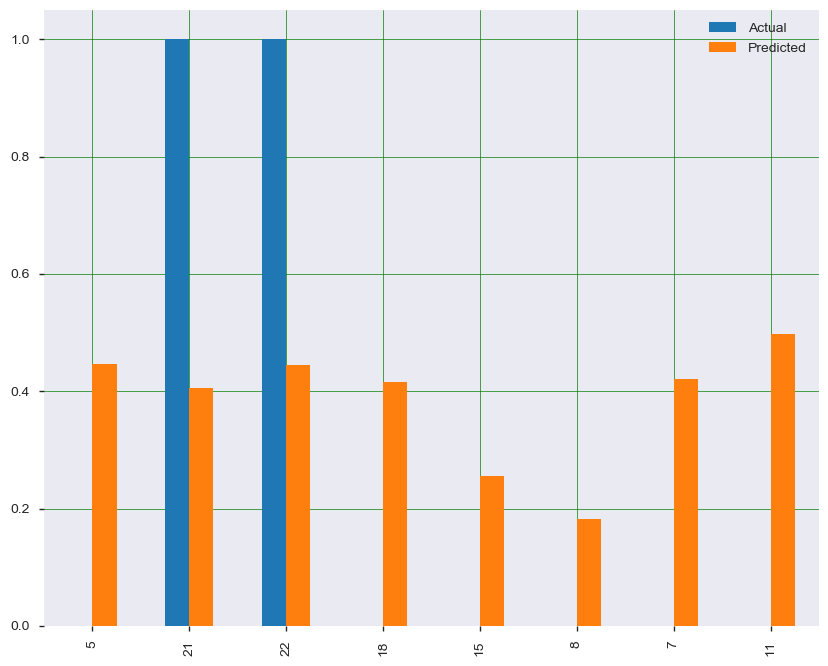

In [808]:
plot6 = df6.head(25)
plot6.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [822]:
#features test 7 Demographic info with default as dependent
X7 = credit.iloc[:,0:5]
X7.head()

#dependent variable 
y7= credit['default_payment_ next_month']

#model
model7 = LinearRegression(n_jobs = 15)

#Cross Validation
print(cross_val_score(model7, X7, y7, cv = 3))

[-1.21044609 -0.2753219  -0.20212873]


In [823]:
X7.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000,2,2,1,24
1,120000,2,2,2,26
2,90000,2,2,2,34
3,50000,2,2,1,37
4,50000,1,2,1,57


In [824]:
#regression
results = []
names = []
for name, model7 in algosClass:
        result = cross_val_score(model7, X7, y7, cv = 3, scoring = 'r2')
        names.append(name)
        results.append(result)
        
for i in range (len(names)):
    print(names[i], results[i].mean())

RandomForestRegressor -0.22822888888888881
LinearRegression -0.5626322416479411
SupportVectorRegression -0.1639697206235778


In [827]:
#Train/Test Split
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size = 0.30, random_state = 123)

In [828]:
#modeling
algo = LinearRegression()
model7 = LinearRegression()
model7 = LinearRegression().fit(X_train7, y_train7)

In [829]:
predictions7 = model7.predict(X_test7)
print(predictions7)

[ 0.01501886  0.49520096  0.42659861  0.11741268  0.05511266  0.91103344
  0.52973321 -0.46539624]


In [830]:
rmse7 = sqrt(mean_squared_error(y_test7, predictions7))
predRsquared7 = r2_score(y_test7,predictions7)

In [831]:
#Make Predictions
predictions7 = model7.predict(X_test7)
predRsquared7 = r2_score(y_test7, predictions7)
rmse7 = sqrt(mean_squared_error(y_test7, predictions7))
print('R Squared: %.3f' % predRsquared7)
print('rmse: %.3f' % rmse7)

R Squared: -0.285
rmse: 0.491


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


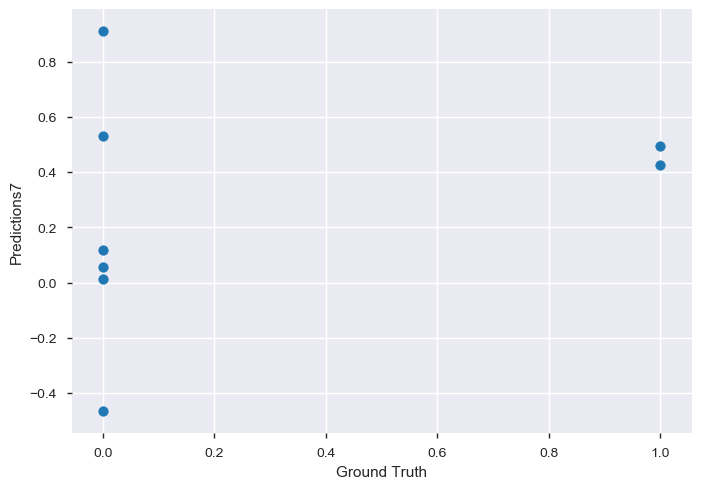

In [832]:
plt.scatter(y_test7, predictions7)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions7')
plt.show();

In [841]:
df7 = pd.DataFrame({'Actual': y_test7, 'Predicted': predictions7})
print(df7)

    Actual  Predicted
5        0   0.015019
21       1   0.495201
22       1   0.426599
18       0   0.117413
15       0   0.055113
8        0   0.911033
7        0   0.529733
11       0  -0.465396


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


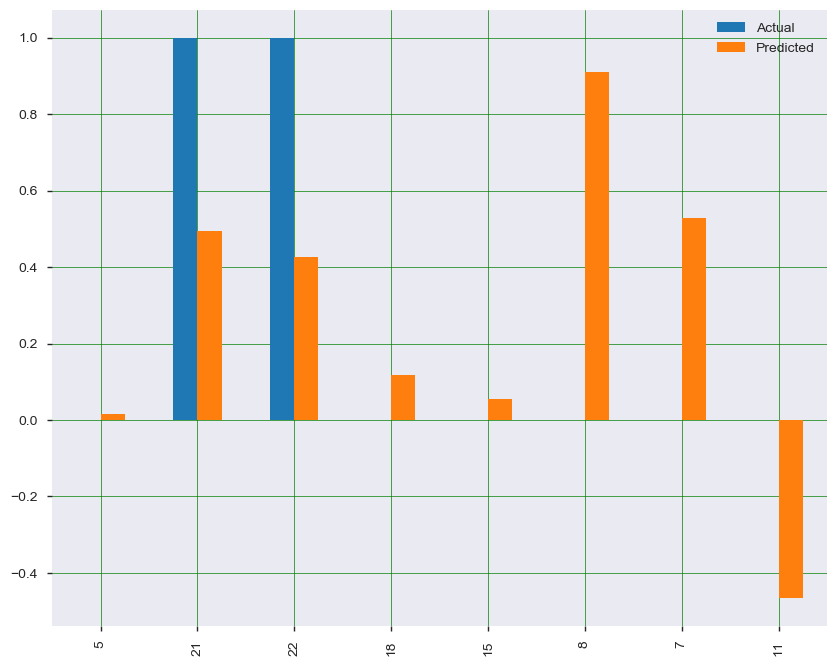

In [842]:
plot7 = df7.head(25)
plot7.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [874]:
#features test 8 Demographic info with default as dependent
X8 = credit.iloc[:,0:5]
X8.head()

#dependent variable 
y8= credit['default_payment_ next_month']

#model
model8 = LinearRegression(fit_intercept = True, normalize = True)

#Cross Validation
print(cross_val_score(model8, X8, y8, cv = 3))

[-1.21044609 -0.2753219  -0.20212873]


In [875]:
for i in range (len(names)):
    print(names[i], results[i].mean())

RandomForestRegressor -0.22822888888888881
LinearRegression -0.5626322416479411
SupportVectorRegression -0.1639697206235778


In [862]:
#Train/Test Split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size = 0.30, random_state = 123)

In [871]:
#modeling
algo = LinearRegression()
model8 = LinearRegression()
model8 = LinearRegression().fit(X_train8, y_train8)

In [864]:
predictions8 = model8.predict(X_test8)
print(predictions8)

[ 0.01501886  0.49520096  0.42659861  0.11741268  0.05511266  0.91103344
  0.52973321 -0.46539624]


In [872]:
rmse8 = sqrt(mean_squared_error(y_test8, predictions8))
predRsquared8 = r2_score(y_test8,predictions8)

In [873]:
#Make Predictions
predictions8 = model8.predict(X_test8)
predRsquared8 = r2_score(y_test8, predictions8)
rmse8 = sqrt(mean_squared_error(y_test8, predictions8))
print('R Squared: %.3f' % predRsquared8)
print('rmse: %.3f' % rmse8)

R Squared: -0.285
rmse: 0.491


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


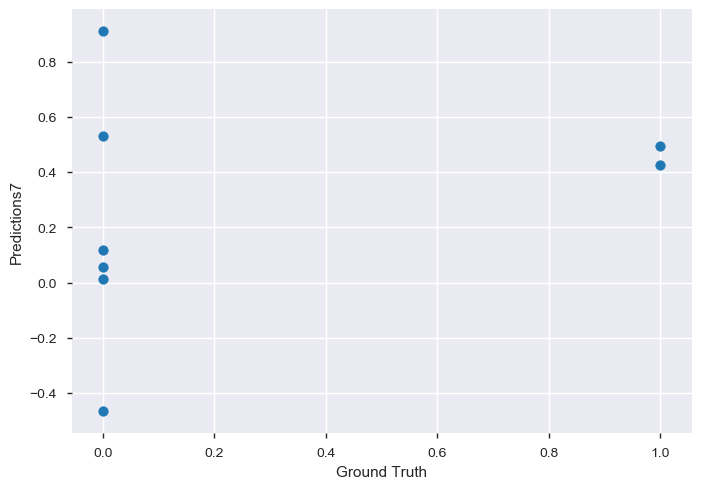

In [868]:
plt.scatter(y_test8, predictions8)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions7')
plt.show();

In [869]:
df8 = pd.DataFrame({'Actual': y_test8, 'Predicted': predictions8})
print(df8)

    Actual  Predicted
5        0   0.015019
21       1   0.495201
22       1   0.426599
18       0   0.117413
15       0   0.055113
8        0   0.911033
7        0   0.529733
11       0  -0.465396


C:\Users\Marko\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


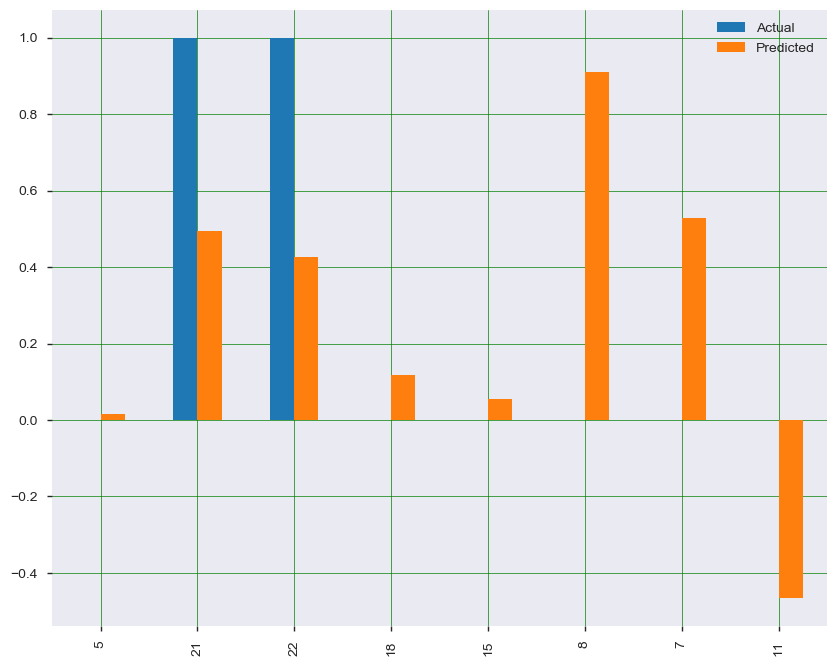

In [870]:
plot8 = df8.head(25)
plot8.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()